In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('data.csv')

In [4]:
df.head()

,Country,Year,Food Category,Total Waste (Tons),Economic Loss (Million $),Avg Waste per Capita (Kg),Population (Million),Household Waste (%)
0,Australia,2019,Fruits & Vegetables,19268.63,18686.68,72.69,87.59,53.64
1,Indonesia,2019,Prepared Food,3916.97,4394.48,192.52,1153.99,30.61
2,Germany,2022,Dairy Products,9700.16,8909.16,166.94,1006.11,48.08
3,France,2023,Fruits & Vegetables,46299.69,40551.22,120.19,953.05,31.91
4,France,2023,Beverages,33096.57,36980.82,104.74,1105.47,36.06


In [5]:
df.shape

(5000, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Country                    5000 non-null   object 
 1   Year                       5000 non-null   int64  
 2   Food Category              5000 non-null   object 
 3   Total Waste (Tons)         5000 non-null   float64
 4   Economic Loss (Million $)  5000 non-null   float64
 5   Avg Waste per Capita (Kg)  5000 non-null   float64
 6   Population (Million)       5000 non-null   float64
 7   Household Waste (%)        5000 non-null   float64
dtypes: float64(5), int64(1), object(2)
memory usage: 312.6+ KB


In [7]:
df['Country'].value_counts()

Country
Germany         287
Spain           274
China           262
Brazil          258
India           257
USA             257
Turkey          256
Canada          254
Italy           253
Mexico          251
South Africa    245
Indonesia       244
UK              242
South Korea     241
Japan           240
France          239
Saudi Arabia    239
Argentina       238
Russia          237
Australia       226
Name: count, dtype: int64

In [8]:
df['Food Category'].value_counts()

Food Category
Prepared Food          711
Beverages              639
Bakery Items           630
Fruits & Vegetables    620
Dairy Products         616
Meat & Seafood         605
Frozen Food            596
Grains & Cereals       583
Name: count, dtype: int64

In [9]:
from sklearn.preprocessing import OneHotEncoder
en = OneHotEncoder(sparse_output=False)

In [10]:
en.fit_transform(df[['Country', 'Food Category']])

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(5000, 28))

In [11]:
en.get_feature_names_out(['Country', 'Food Category']) 

array(['Country_Argentina', 'Country_Australia', 'Country_Brazil',
       'Country_Canada', 'Country_China', 'Country_France',
       'Country_Germany', 'Country_India', 'Country_Indonesia',
       'Country_Italy', 'Country_Japan', 'Country_Mexico',
       'Country_Russia', 'Country_Saudi Arabia', 'Country_South Africa',
       'Country_South Korea', 'Country_Spain', 'Country_Turkey',
       'Country_UK', 'Country_USA', 'Food Category_Bakery Items',
       'Food Category_Beverages', 'Food Category_Dairy Products',
       'Food Category_Frozen Food', 'Food Category_Fruits & Vegetables',
       'Food Category_Grains & Cereals', 'Food Category_Meat & Seafood',
       'Food Category_Prepared Food'], dtype=object)

In [12]:
df2 = pd.DataFrame(en.fit_transform(df[['Country', 'Food Category']]), columns=en.get_feature_names_out(['Country', 'Food Category']))

In [13]:
final_df = pd.concat([df, df2], axis=1)

In [14]:
final_df.drop(['Country', 'Food Category'], axis=1, inplace=True)

In [15]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 34 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Year                               5000 non-null   int64  
 1   Total Waste (Tons)                 5000 non-null   float64
 2   Economic Loss (Million $)          5000 non-null   float64
 3   Avg Waste per Capita (Kg)          5000 non-null   float64
 4   Population (Million)               5000 non-null   float64
 5   Household Waste (%)                5000 non-null   float64
 6   Country_Argentina                  5000 non-null   float64
 7   Country_Australia                  5000 non-null   float64
 8   Country_Brazil                     5000 non-null   float64
 9   Country_Canada                     5000 non-null   float64
 10  Country_China                      5000 non-null   float64
 11  Country_France                     5000 non-null   float

<Axes: ylabel='Density'>

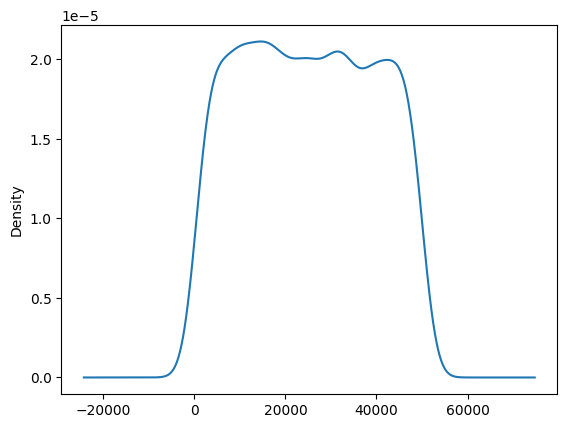

In [21]:
df['Total Waste (Tons)'].plot(kind='density')

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats


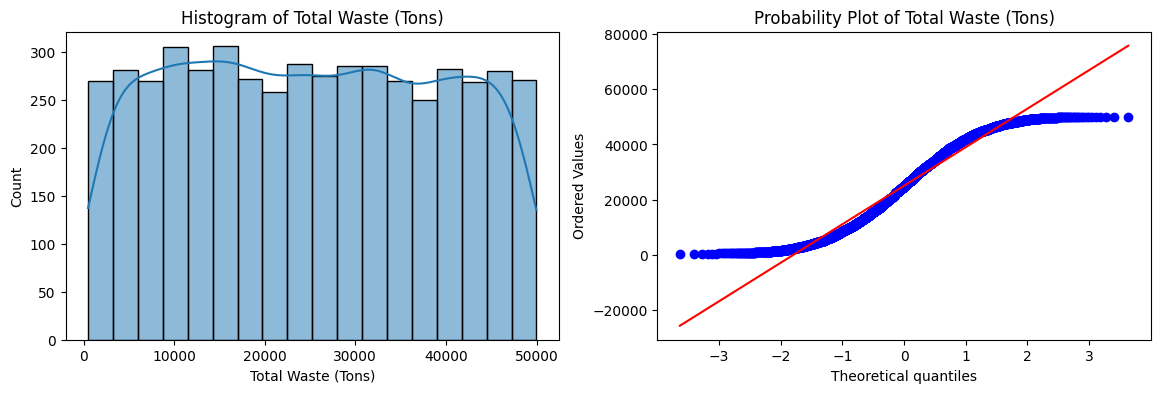

In [25]:
plt.figure(figsize=(14, 4))

plt.subplot(1, 2, 1)
sns.histplot(df['Total Waste (Tons)'], kde=True)
plt.title('Histogram of Total Waste (Tons)')

plt.subplot(1, 2, 2)
stats.probplot(df['Total Waste (Tons)'], plot=plt)
plt.title('Probability Plot of Total Waste (Tons)')
plt.show()

In [39]:
from sklearn.preprocessing import FunctionTransformer

transformer = FunctionTransformer(func=np.log1p)

transformer.fit_transform(df[['Total Waste (Tons)']])

,Total Waste (Tons)
0,9.866286
1,8.273329
2,9.180001
3,10.742912
4,10.407215
...,...
4995,10.769027
4996,10.384021
4997,9.935081
4998,10.187449


Text(0.5, 1.0, 'Histogram of Total Waste (Tons)')

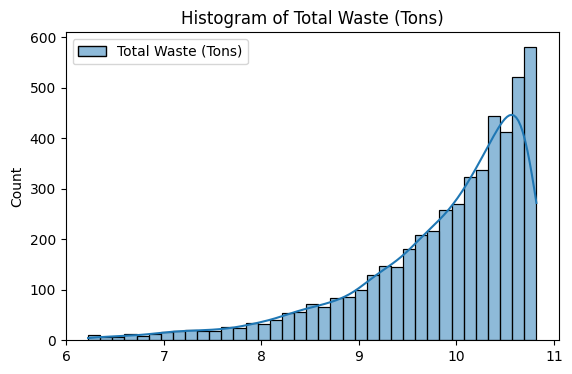

In [40]:
plt.figure(figsize=(14, 4))

plt.subplot(1, 2, 1)
sns.histplot(transformer.fit_transform(df[['Total Waste (Tons)']]), kde=True)
plt.title('Histogram of Total Waste (Tons)')

# plt.subplot(1, 2, 2)
# stats.probplot(transformer.fit_transform(df[['Total Waste (Tons)']]), plot=plt)
# plt.title('Probability Plot of Total Waste (Tons)')
# plt.show()